# Copernicus example: Plot generic netcdf files: section and spatial plots

In [1]:
import warnings
warnings.filterwarnings('ignore')

import os
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap

import gsw.density as density

In [2]:
def getRangeIndexes(arr, var_min, var_max):
    return np.where((arr >= var_min) & (arr <= var_max))[0]

In [3]:
#df = xr.open_dataset('nioa_climatology_monthly_temp_salt_nio.nc')
#print(df)

path_in = "./"
out_path = "./"

file_ds = xr.open_dataset(path_in + 'global-analysis-forecast-phy-001-024-monthly_1643785075501.nc')
print(file_ds)
file_ds.info

<xarray.Dataset>
Dimensions:    (time: 1, latitude: 397, longitude: 481, depth: 32)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 380.2 453.9 541.1
  * latitude   (latitude) float32 -3.0 -2.917 -2.833 -2.75 ... 29.83 29.92 30.0
  * time       (time) datetime64[ns] 2020-05-16T12:00:00
  * longitude  (longitude) float32 40.0 40.08 40.17 40.25 ... 79.83 79.92 80.0
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:                       http://mari

<bound method Dataset.info of <xarray.Dataset>
Dimensions:    (time: 1, latitude: 397, longitude: 481, depth: 32)
Coordinates:
  * depth      (depth) float32 0.494 1.541 2.646 3.819 ... 380.2 453.9 541.1
  * latitude   (latitude) float32 -3.0 -2.917 -2.833 -2.75 ... 29.83 29.92 30.0
  * time       (time) datetime64[ns] 2020-05-16T12:00:00
  * longitude  (longitude) float32 40.0 40.08 40.17 40.25 ... 79.83 79.92 80.0
Data variables:
    mlotst     (time, latitude, longitude) float32 ...
    vo         (time, depth, latitude, longitude) float32 ...
    thetao     (time, depth, latitude, longitude) float32 ...
    uo         (time, depth, latitude, longitude) float32 ...
    so         (time, depth, latitude, longitude) float32 ...
Attributes: (12/18)
    title:                         Monthly mean fields for product GLOBAL_ANA...
    references:                    http://marine.copernicus.eu
    credit:                        E.U. Copernicus Marine Service Information...
    licence:    

In [4]:
# Set the coordinate names (used later for accessing the data)
lon_name = "longitude"
lat_name = "latitude"
time_name = "time"
depth_name = "depth"

# Set the variable names
tem_name = "thetao"
sal_name = "so"
mld_name = "mlotst"
uo_name = "uo"
vo_name = "vo"

In [5]:
# --- Choose the variable to plot (but comment the others with the symbol #): ---
var_sel = file_ds[tem_name]

#var_sel = file_ds[j][sal_name]
#var_sel = file_ds[j][mld_name]
#var_sel = file_ds[j][uo_name]
#var_sel = file_ds[j][vo_name]

dataset_3D = False 
if depth_name in var_sel.coords:
    dataset_3D = True
    
# --- Set up the arrays of coordinates for the selected dataset ---
# 
lats = var_sel[lat_name]
lons = var_sel[lon_name]
times = var_sel[time_name]
depths = var_sel[depth_name] if dataset_3D else []

###### Set the variable's min and max values for the plot and the colorbar (otherwise assign None):

In [6]:
# Set lat-lon limits - FULL AREA
lat_min = lats.min()
lat_max = lats.max()
lon_min = lons.min()
lon_max = lons.max()

# # Set lat-lon limits - CUSTOM AREA
# lon_min = 110
# lon_max = 140
# lat_min = 10
# lat_max = 40

In [7]:
# For automatic colobar limits
min_value, max_value = None, None 

In [8]:
# Set the desired depth (in meters)
d = 0

#### Plot configuration

In [9]:
# Plot configuration
width_inch = 16
height_inch = 8

# Map configuration
map_config = { 
#     "projection": "merc",
    "llcrnrlat": lat_min,
    "llcrnrlon": lon_min,
    "urcrnrlat": lat_max,
    "urcrnrlon": lon_max,
    "resolution": 'i',
    "epsg": 4326
}

# Axes labels
fontsize = 14
xlabel = 'longitude [deg]'
ylabel = 'latitude [deg]'
xlabelpad = 30
ylabelpad = 60

# Colorbar configuration
cmap = "viridis"
# color-blindness friendly: viridis, cividis
# NOT color-blindness friendly: plasma, inferno, magma, jet
cbar_position = "right"

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}

label_fontstyle = {
    "fontsize": "12",
    "labelpad": 30
}

#### Map generation

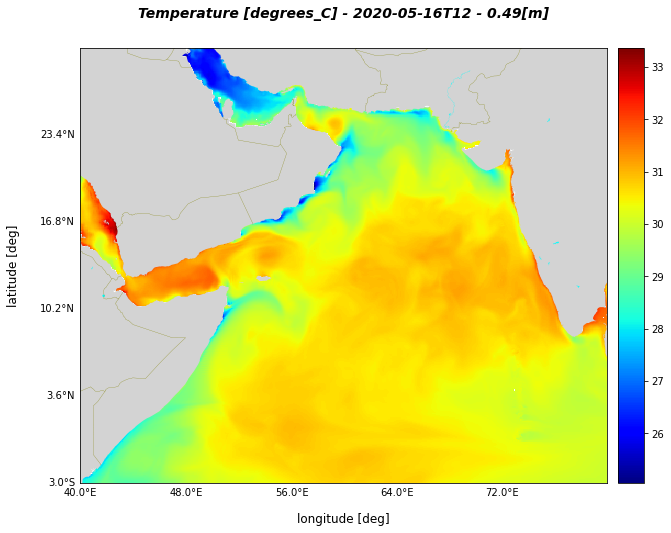

In [11]:
# Set the coordinates indexes
lat_indexes = getRangeIndexes(lats, lat_min, lat_max)
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
time_indexes = [0]
depth_indexes = [0]

# Get the selected coordinates:
lats_sel = lats[lat_indexes]
lons_sel = lons[lon_indexes]

for t in time_indexes:
 
    if dataset_3D:
        data = var_sel[t, :, lat_indexes, lon_indexes].sel(depth=d,method='nearest')
    else: 
        data = var_sel[t, lat_indexes, lon_indexes]

    plt.figure(figsize=(width_inch, height_inch))

    map = Basemap(**map_config)

    ## contour fill
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
    step_value = 0.5
    contour_levels = np.arange(min_value, max_value, step_value)
    # map.contourf(xx, yy, data, contour_levels, cmap=cmap)

    
    ## pcolormesh
    x = np.linspace(0, map.urcrnrx, data.shape[1])
    y = np.linspace(0, map.urcrnry, data.shape[0])
    
    xx, yy = np.meshgrid(lons_sel, lats_sel)
    
#     colormesh = map.pcolormesh(xx, yy, data, cmap=cmap)
    colormesh = map.pcolormesh(xx, yy, data, vmin=min_value, vmax=max_value, cmap=cmap)
    
    ## draw meridians and parallels
    step_lat = float((lat_max - lat_min) / 5)
    step_lon = float((lon_max - lon_min) / 5)

    parallels = np.arange(lat_min, lat_max, step_lat)
    meridians = np.arange(lon_min, lon_max, step_lon) 

    map.drawmeridians(meridians, labels=[0,0,0,1], fmt="%2.1f", linewidth=0.0)
    map.drawparallels(parallels, labels=[1,0,0,0], fmt="%2.1f", linewidth=0.0)

    ## draw colorbar
    map.colorbar(colormesh, cbar_position)

    ## draw countries...
    map.drawcountries(linewidth=0.25, color='olive')
    map.fillcontinents(color='lightgray',lake_color='aqua')

    ## ... or draw the world using data from different providers (comment the previous lines!)
#     map.arcgisimage(service='World_Shaded_Relief', xpixels = 1500, verbose=False)
#     map.arcgisimage(service='ESRI_Imagery_World_2D', xpixels = 1500, verbose=False) 
#     map.bluemarble()
#     map.etopo()
#     map.shadedrelief()

    # set title
    title_sel = data.long_name
    timestep = np.datetime_as_string(times[t],'h')
    var_str = "{} [{}]".format(title_sel, data.units)
    if dataset_3D:
        depth_str = "{:.2f}{}".format(float(data[depth_name]), "[m]")
        title = ' - '.join((var_str, timestep, depth_str))
    else:
        title = ' - '.join((var_str, timestep))
    
    ## draw title and axes labels
    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, labelpad=xlabelpad, fontsize=12)
    plt.ylabel(ylabel, labelpad=ylabelpad, fontsize=12)    
    
    # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".jpg"

    # save the output file
    plt.savefig(output_file,bbox_inches='tight',dpi=300)

    plt.show()

    plt.close()

# Transect plot

In [21]:
depth_min = 0
depth_max = 3500 
lat_point = 18
lon_min = 50
lon_max = 74

In [22]:
depth_indexes = getRangeIndexes(file_ds.depth, depth_min, depth_max)
lat_indexes = np.abs(lats-lat_point).argmin()
lon_indexes = getRangeIndexes(lons, lon_min, lon_max)
time_indexes = 0

In [23]:
# index for the ds arrays
ds = file_ds

lons_sel = ds[lon_name][lon_indexes]
lats_sel = ds[lat_name][lat_indexes]
depths_sel = -ds[depth_name][depth_indexes] # note the minus '-ds'. Why?

In [24]:
TEM = [ds[tem_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]
SAL = [ds[sal_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]
MLD = [ds[mld_name][time_indexes, lat_indexes, lon_indexes]]
UO = [ds[uo_name][time_indexes, depth_indexes, lat_indexes, lon_indexes]]

##### Set the parameters for the plot

In [25]:
# Plot configuration
width_inch = 14
height_inch = 8

# Axes labels
fontsize = 14
xlabel = "latitude [degN]"
ylabel = "depth [m]"

# Colorbar configuration
cmap = "viridis"
# color-blindness friendly: viridis, cividis
# NOT color-blindness friendly: plasma, inferno, magma, jet
cbar_position = "right"

contour_levels = 100

title_fontstyle = {
    "fontsize": "14",
    "fontstyle": "italic",
    "fontweight": "bold",
    "pad": 30
}
label_fontstyle = {
    "fontsize": "12",
#     "labelpad": 10
}

# Function for plotting the transect

In [26]:
# arguments:
# - data: data to plot - 2 dim array
# - minmaxvalues: [{ "min": None, "max": None},{ "min": None, "max": None}]
# - step_value: step in levels. If is 0, then levels = 100
# - title
# - lats_sel
# - depths_sel
#
def plot_transect(data_plot, minmaxvalues, step_value, title, lons_sel, depths_sel):
    title_sel = title['name']
    title_uni = title['units']
    
    fig = plt.figure(figsize=(width_inch, height_inch))
    
    # Create the meshgrid for the plot 
    xx, yy = np.meshgrid(lons_sel, depths_sel)
    
    ### --- PLOT 1 ---###
    fig.add_subplot(1, 2, 1)
    idx = 0
    data = data_plot[idx]
    min_value = minmaxvalues[idx]['min']
    max_value = minmaxvalues[idx]['max']
  
    # set variable limits
    min_value = data.min() if min_value is None else min_value
    max_value = data.max() if max_value is None else max_value
   
    contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100
    
    ## contour fill
    plt.contourf(xx, yy, data, contour_levels, cmap=cmap, vmin=min_value, vmax=max_value)
    
    plt.grid()
#     plt.colorbar(colormesh,extend='both')
#    plt.colorbar(extend='both')
    plt.colorbar()
    
    # Get the timestep
    timestep = np.datetime_as_string(data.time,'h')
    
    var_str = "{} [{}]".format(title_sel, title_uni)
    title = ' - '.join((var_str, timestep))
    
    plt.title(title, **title_fontstyle)
    plt.xlabel(xlabel, **label_fontstyle)
    plt.ylabel(ylabel, **label_fontstyle)
    
    
#     ### --- PLOT 2 ---###
#     fig.add_subplot(1, 2, 2)
#     idx = 1
#     data = data_plot[idx]
#     min_value = minmaxvalues[idx]['min']
#     max_values = minmaxvalues[idx]['max']
    
#     # set variable limits
#     min_value = data.min() if min_value is None else min_value
#     max_value = data.max() if max_value is None else max_value
    
#     contour_levels = np.arange(min_value, max_value, step_value)  if step_value > 0 else 100
    
#     ## contour fill
#     plt.contourf(xx, yy, data, contour_levels, cmap=cmap, vmin=min_value, vmax=max_value)
    
#     plt.grid()
# #     plt.colorbar(colormesh,extend='both')
# #    plt.colorbar(extend='both')
#     plt.colorbar()
        
#     # Get the timestep
#     timestep = np.datetime_as_string(data.time,'h')
#     var_str = "{} [{}]".format(title_sel, title_uni)
#     title = ' - '.join((var_str, timestep))

#     plt.title(title, **title_fontstyle)
#     plt.xlabel(xlabel, **label_fontstyle)
#     plt.ylabel(ylabel, **label_fontstyle)

    # output file
    output_file = os.path.join(out_path,title.replace(' ','_')) + ".png"

    # save the output file
    plt.savefig(output_file)

    plt.show()

    plt.close()

## plot temperature vertical cross-section using the above function

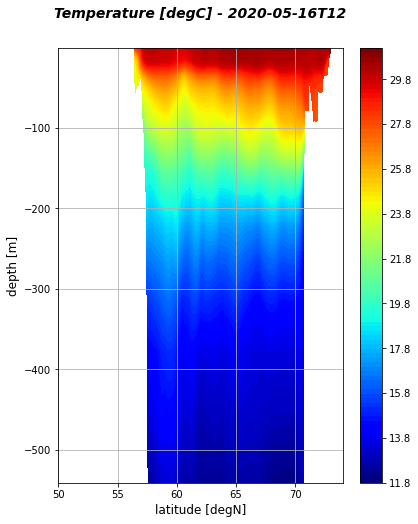

In [27]:
data = TEM

title = {"name":"Temperature","units":"degC"}

# plot the transect
plot_transect(data, [{ "min": None, "max": None},{ "min": None, "max": None}], 0, title, lons_sel, depths_sel)

## END OF CODE

### usable only after verification